# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [4]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21/result-lstm-tcp21-hl2-seq2-do0.2-oov4000-part_2_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_2_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [5]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.12-55180-192.168.10.50-21-tcp,0.390805,1,0,0,6819.270588,1,1,0
1,192.168.10.25-61756-192.168.10.50-21-tcp,0.344828,0,0,0,3454.529412,0,0,0
2,192.168.10.15-52358-192.168.10.50-21-tcp,0.367816,0,0,0,3101.247059,0,0,0
3,192.168.10.15-52240-192.168.10.50-21-tcp,0.390805,1,0,0,5716.223529,1,0,0
4,192.168.10.19-59655-192.168.10.50-21-tcp,0.379310,0,0,0,4639.576471,0,0,0


In [6]:
df_truth.head()

,ID,Label
0,192.168.10.12-55180-192.168.10.50-21-tcp,BENIGN
1,192.168.10.25-61756-192.168.10.50-21-tcp,BENIGN
2,192.168.10.15-52358-192.168.10.50-21-tcp,BENIGN
3,192.168.10.15-52240-192.168.10.50-21-tcp,BENIGN
4,192.168.10.19-59655-192.168.10.50-21-tcp,BENIGN


In [7]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        438
0        186
Name: count, dtype: int64

## Exploratory Data Analysis

In [8]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        438
0        186
Name: count, dtype: int64

In [9]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           338
0           286
Name: count, dtype: int64

In [10]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [11]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [12]:
df_pred["id"]

0      192.168.10.12-55180-192.168.10.50-21-tcp
1      192.168.10.25-61756-192.168.10.50-21-tcp
2      192.168.10.15-52358-192.168.10.50-21-tcp
3      192.168.10.15-52240-192.168.10.50-21-tcp
4      192.168.10.19-59655-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.16-50028-192.168.10.50-21-tcp
620    192.168.10.12-36654-192.168.10.50-21-tcp
621     192.168.10.8-56985-192.168.10.50-21-tcp
622    192.168.10.17-55507-192.168.10.50-21-tcp
623     192.168.10.5-64559-192.168.10.50-21-tcp
Name: id, Length: 624, dtype: object

In [13]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0      192.168.10.12-55180-192.168.10.50-21-tcp
1      192.168.10.25-61756-192.168.10.50-21-tcp
2      192.168.10.15-52358-192.168.10.50-21-tcp
3      192.168.10.15-52240-192.168.10.50-21-tcp
4      192.168.10.19-59655-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.16-50028-192.168.10.50-21-tcp
620    192.168.10.12-36654-192.168.10.50-21-tcp
621     192.168.10.8-56985-192.168.10.50-21-tcp
622    192.168.10.17-55507-192.168.10.50-21-tcp
623     192.168.10.5-64559-192.168.10.50-21-tcp
Name: ID, Length: 624, dtype: object

In [14]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [15]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [16]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
87,172.16.0.1-59310-192.168.10.50-21-tcp,0.571429,1,1,1,9841.900000,1,1,1,1
88,172.16.0.1-53774-192.168.10.50-21-tcp,0.441176,1,1,0,6628.843750,1,1,0,1
89,172.16.0.1-52150-192.168.10.50-21-tcp,0.379310,0,0,0,5747.222222,1,0,0,1
90,172.16.0.1-52120-192.168.10.50-21-tcp,0.406250,1,0,0,4937.433333,0,0,0,1
91,172.16.0.1-57092-192.168.10.50-21-tcp,0.513514,1,1,1,10139.942857,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
578,172.16.0.1-57400-192.168.10.50-21-tcp,0.478632,1,1,1,8357.617391,1,1,1,1
579,172.16.0.1-57050-192.168.10.50-21-tcp,0.387097,1,0,0,7423.448276,1,1,1,1
580,172.16.0.1-52344-192.168.10.50-21-tcp,0.457143,1,1,1,5512.454545,1,0,0,1
581,172.16.0.1-54366-192.168.10.50-21-tcp,0.528302,1,1,1,6795.673077,1,1,0,1


In [17]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.12-55180-192.168.10.50-21-tcp,0.390805,1,0,0,6819.270588,1,1,0,0
1,192.168.10.25-61756-192.168.10.50-21-tcp,0.344828,0,0,0,3454.529412,0,0,0,0
2,192.168.10.15-52358-192.168.10.50-21-tcp,0.367816,0,0,0,3101.247059,0,0,0,0
3,192.168.10.15-52358-192.168.10.50-21-tcp,0.367816,0,0,0,3101.247059,0,0,0,0
4,192.168.10.15-52240-192.168.10.50-21-tcp,0.390805,1,0,0,5716.223529,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
629,192.168.10.16-50028-192.168.10.50-21-tcp,0.344828,0,0,0,3233.917647,0,0,0,0
630,192.168.10.12-36654-192.168.10.50-21-tcp,0.356322,0,0,0,3999.023529,0,0,0,0
631,192.168.10.8-56985-192.168.10.50-21-tcp,0.310345,0,0,0,3912.541176,0,0,0,0
632,192.168.10.17-55507-192.168.10.50-21-tcp,0.356322,0,0,0,3291.458824,0,0,0,0


In [18]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.12-55180-192.168.10.50-21-tcp,0.390805,1,0,0,6819.270588,1,1,0,0
1,192.168.10.25-61756-192.168.10.50-21-tcp,0.344828,0,0,0,3454.529412,0,0,0,0
2,192.168.10.15-52358-192.168.10.50-21-tcp,0.367816,0,0,0,3101.247059,0,0,0,0
3,192.168.10.15-52358-192.168.10.50-21-tcp,0.367816,0,0,0,3101.247059,0,0,0,0
4,192.168.10.15-52240-192.168.10.50-21-tcp,0.390805,1,0,0,5716.223529,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
629,192.168.10.16-50028-192.168.10.50-21-tcp,0.344828,0,0,0,3233.917647,0,0,0,0
630,192.168.10.12-36654-192.168.10.50-21-tcp,0.356322,0,0,0,3999.023529,0,0,0,0
631,192.168.10.8-56985-192.168.10.50-21-tcp,0.310345,0,0,0,3912.541176,0,0,0,0
632,192.168.10.17-55507-192.168.10.50-21-tcp,0.356322,0,0,0,3291.458824,0,0,0,0


In [19]:
df_pred[['Label']].value_counts()

Label
1        496
0        138
Name: count, dtype: int64

In [20]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [21]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [22]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
629,0
630,0
631,0
632,0


### Detection Rate

In [23]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9354838709677419
Recall-Binary-b_iqr: 0.8830645161290323
Recall-Binary-b_zscore: 0.6814516129032258
Recall-Floating-f_mean: 0.9354838709677419
Recall-Floating-f_iqr: 0.8084677419354839
Recall-Floating-f_zscore: 0.6149193548387096


### Confussion Matrix

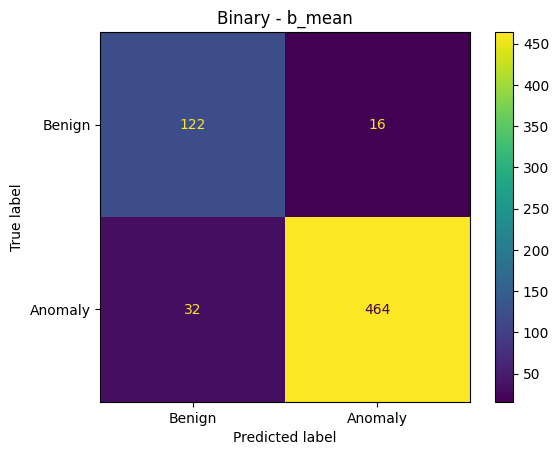

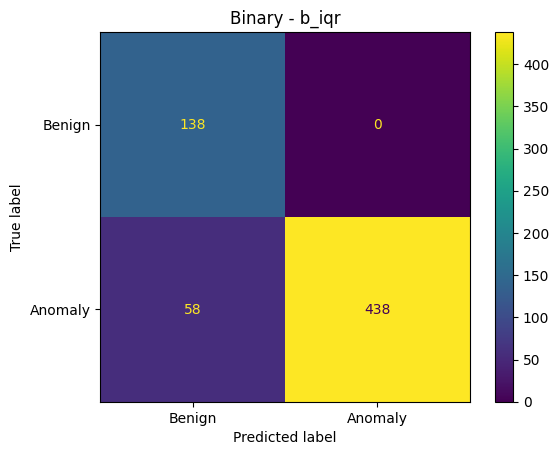

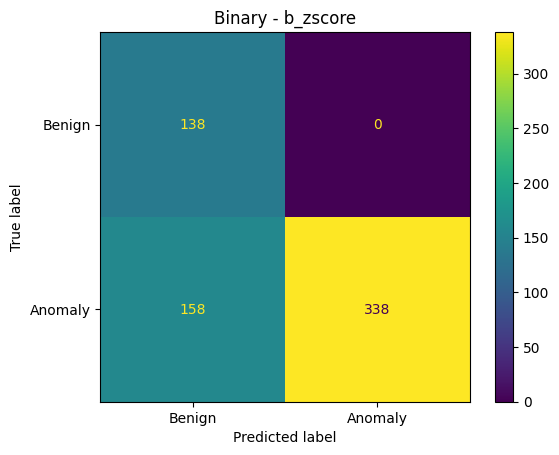

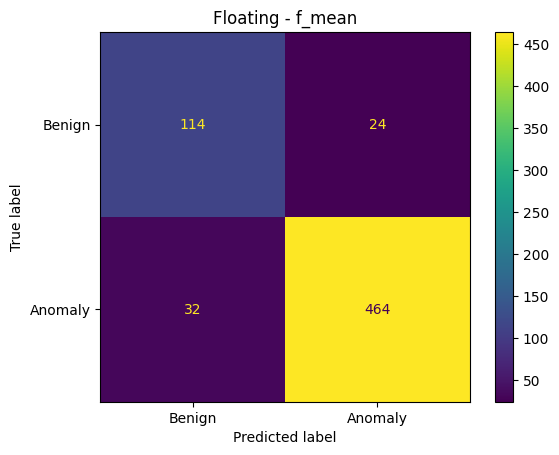

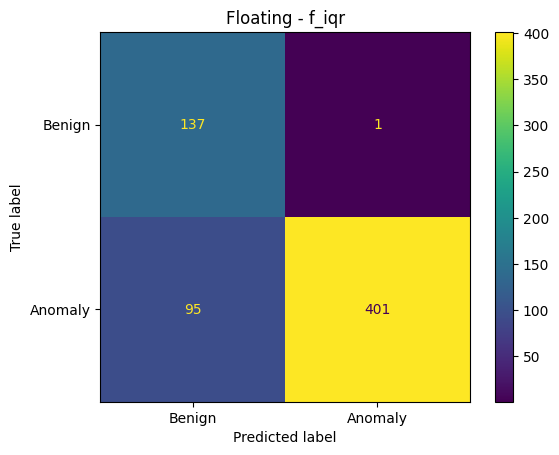

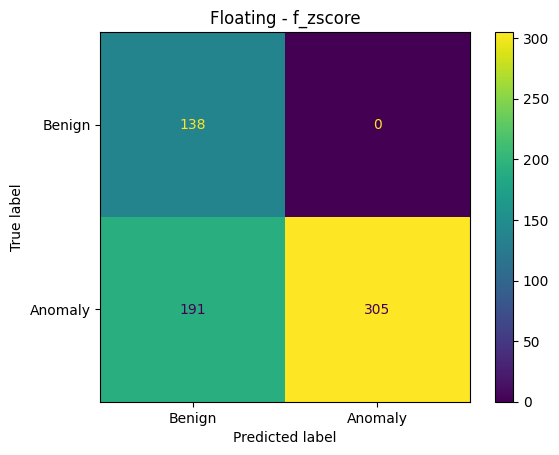

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [25]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9415584415584416
F2-Binary-b_iqr: 0.9042113955408753
F2-Binary-b_zscore: 0.7278208440999139
F2-Floating-f_mean: 0.9385113268608414
F2-Floating-f_iqr: 0.8403185247275775
F2-Floating-f_zscore: 0.6662297946701616


### FPR Score

In [26]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.11594202898550725
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.17391304347826086
FPR-Floating-f_iqr: 0.007246376811594203
FPR-Floating-f_zscore: 0.0


In [27]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9242902208201893
Accuracy-Binary-b_iqr: 0.9085173501577287
Accuracy-Binary-b_zscore: 0.750788643533123
Accuracy-Floating-f_mean: 0.9116719242902208
Accuracy-Floating-f_iqr: 0.8485804416403786
Accuracy-Floating-f_zscore: 0.6987381703470031


In [28]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.935484,0.941558,0.115942,0.924290
b_iqr,0.883065,0.904211,0.000000,0.908517
b_zscore,0.681452,0.727821,0.000000,0.750789
f_mean,0.935484,0.938511,0.173913,0.911672
f_iqr,0.808468,0.840319,0.007246,0.848580
f_zscore,0.614919,0.666230,0.000000,0.698738


In [29]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [30]:
# %pip install openpyxl